# 1) LOADING MODULES AND DATASETS

In [1]:
##Loading modules 
import warnings
warnings.filterwarnings('ignore')

import numpy as np ## array processing
import pandas as pd ## dataframe processing
import math
import re

from sklearn.preprocessing  import OneHotEncoder, MinMaxScaler, StandardScaler, OrdinalEncoder ## encoding
from sklearn.compose import ColumnTransformer, make_column_transformer ##transformer
from sklearn.pipeline import Pipeline, make_pipeline ## pipeline
from sklearn.impute import SimpleImputer ## imputation
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV ## cross-validation
from sklearn.linear_model import LinearRegression, Lasso, Ridge ## Linear Regression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error ## Root Mean Squared Error
from sklearn.ensemble import RandomForestRegressor ## Random Forest

import seaborn as sns ##Visualisation
import matplotlib.pyplot as plt ## Visualisation
import xgboost as xgbs ##Xgboost
import eli5 # names from transformers

In [2]:
data_train = pd.read_csv(r'/Users/Humza Ali/OneDrive/Documents/Data/Practise/train.csv') ## Loading Train datasets

In [3]:
data_test = pd.read_excel(r'/Users/Humza Ali/OneDrive/Documents/Data/Practise/test.xlsx') ## Loading test datatsets

In [4]:
data_train.head() ## Checking first 5 row of datasets

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,log_price,
0,6901257,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,...,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,5.010635,NaN
1,6304928,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,...,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,5.129899,NaN
2,7919400,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,...,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,4.976734,NaN
3,13418779,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,...,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0,6.620073,NaN
4,3808709,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,...,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0,4.744932,NaN


In [5]:
data_test.head()

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,
0,5979389,Apartment,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,1.0,Real Bed,strict,True,NYC,...,-73.915318,Bedroom in Renovated Apartment with Washer/Dryer,Ridgewood,0,NaN,https://a0.muscache.com/im/pictures/b43127ee-b...,11385,1.0,1.0,NaN
1,13488121,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4,1.0,Real Bed,moderate,True,LA,...,-118.317929,Peaceful and Quiet Hollywood Hills,Hollywood Hills,24,100.0,https://a0.muscache.com/im/pictures/894d8ca5-7...,90068,1.0,1.0,NaN
2,8121643,Apartment,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,flexible,False,NYC,...,-74.015211,"Luxury, doorman Building- FIDI",Financial District,0,NaN,NaN,10006,1.0,1.0,NaN
3,16490010,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,flexible,True,NYC,...,-73.945642,Cozy room in sunny historic Greenpoint home,Greenpoint,12,98.0,https://a0.muscache.com/im/pictures/6c99615c-4...,11222,1.0,1.0,NaN
4,16274069,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",4,1.0,Real Bed,moderate,True,NYC,...,-73.943259,B's Suite,Bedford-Stuyvesant,13,92.0,https://a0.muscache.com/im/pictures/56275358/c...,11216,2.0,3.0,NaN


# 2) DATA PREPROCESSING AND FEATURE ENGINEERING (EDA)

In [6]:
data_train.shape, data_test.shape ## Checking No of rows and column in datasets

((49999, 30), (24111, 29))

In [7]:
data_train.dtypes # Checking datatypes of datasets

id                          int64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
log_price                 float64
              

In [8]:
data_test.dtypes # Checking datatypes of datasets

id                                 int64
property_type                     object
room_type                         object
amenities                         object
accommodates                       int64
bathrooms                        float64
bed_type                          object
cancellation_policy               object
cleaning_fee                        bool
city                              object
description                       object
first_review              datetime64[ns]
host_has_profile_pic              object
host_identity_verified            object
host_response_rate               float64
host_since                datetime64[ns]
instant_bookable                  object
last_review               datetime64[ns]
latitude                         float64
longitude                        float64
name                              object
neighbourhood                     object
number_of_reviews                  int64
review_scores_rating             float64
thumbnail_url   

In [9]:
data_train.describe() ## Checking Mean STD of Datasets

,id,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,log_price,
count,4.999900e+04,49999.000000,49853.000000,49999.000000,49999.000000,49999.000000,38698.000000,49937.000000,49908.000000,49999.000000,0.0
mean,1.125866e+07,3.157563,1.235151,38.440220,-92.446264,21.000380,94.055972,1.266776,1.712431,4.781831,NaN
std,6.086302e+06,2.165059,0.582082,3.082650,21.719824,38.131564,7.870579,0.853917,1.259860,0.716910,NaN
min,3.440000e+02,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000,1.609438,NaN
25%,6.245858e+06,2.000000,1.000000,34.124873,-118.343090,1.000000,92.000000,1.000000,1.000000,4.317488,NaN
50%,1.225244e+07,2.000000,1.000000,40.662201,-76.997679,6.000000,96.000000,1.000000,1.000000,4.709530,NaN
75%,1.641108e+07,4.000000,1.000000,40.745985,-73.954598,24.000000,100.000000,1.000000,2.000000,5.220356,NaN
max,2.122836e+07,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,16.000000,7.600402,NaN


In [10]:
data_test.describe() ## Checking Mean STD of Datasets

,id,accommodates,bathrooms,host_response_rate,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,
count,2.411100e+04,24111.000000,24057.000000,18150.000000,24111.000000,24111.000000,24111.000000,18690.000000,24082.000000,24071.000000,0.0
mean,1.128284e+07,3.150222,1.235503,0.944765,38.457759,-92.297225,20.694330,94.091332,1.263765,1.707657,NaN
std,6.072319e+06,2.129642,0.581988,0.161063,3.075066,21.675444,37.193163,7.765832,0.848485,1.242239,NaN
min,3.330000e+03,1.000000,0.000000,0.000000,33.339002,-122.510941,0.000000,20.000000,0.000000,0.000000,NaN
25%,6.289926e+06,2.000000,1.000000,1.000000,34.132860,-118.340694,1.000000,92.000000,1.000000,1.000000,NaN
50%,1.227131e+07,2.000000,1.000000,1.000000,40.661910,-76.995613,6.000000,96.000000,1.000000,1.000000,NaN
75%,1.638105e+07,4.000000,1.000000,1.000000,40.746337,-73.954747,23.000000,100.000000,1.000000,2.000000,NaN
max,2.123090e+07,16.000000,8.000000,1.000000,42.390248,-70.989359,505.000000,100.000000,10.000000,18.000000,NaN


In [11]:
data_train.columns ## Checking No of Columns in Datasets

Index(['id', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'description', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'thumbnail_url', 'zipcode', 'bedrooms', 'beds', 'log_price', ' '],
      dtype='object')

In [12]:
data_train.nunique(axis=0,dropna=True) ## Checking Unique value in datasets

id                        49999
property_type                34
room_type                     3
amenities                 46190
accommodates                 16
bathrooms                    17
bed_type                      5
cancellation_policy           5
cleaning_fee                  2
city                          6
description               49683
first_review               2423
host_has_profile_pic          2
host_identity_verified        2
host_response_rate           77
host_since                 3009
instant_bookable              2
last_review                1257
latitude                  49976
longitude                 49929
name                      49629
neighbourhood               598
number_of_reviews           346
review_scores_rating         53
thumbnail_url             44399
zipcode                     639
bedrooms                     11
beds                         17
log_price                   699
                              0
dtype: int64

In [13]:
data_test.nunique(axis=0,dropna=True) ## Checking Unique value in datasets

id                        24111
property_type                32
room_type                     3
amenities                 22899
accommodates                 16
bathrooms                    17
bed_type                      5
cancellation_policy           5
cleaning_fee                  2
city                          6
description               24036
first_review               2118
host_has_profile_pic          2
host_identity_verified        2
host_response_rate           71
host_since                 2866
instant_bookable              2
last_review                1065
latitude                  24103
longitude                 24101
name                      24019
neighbourhood               566
number_of_reviews           297
review_scores_rating         48
thumbnail_url             21490
zipcode                     603
bedrooms                     11
beds                         17
                              0
dtype: int64

##### Dropping Unwanted Columns

In [14]:
data_train.drop(["amenities","description","latitude","longitude","name","thumbnail_url", " ","zipcode"],1,inplace = True)

In [15]:
data_test.drop(["amenities","description","latitude","longitude","name","thumbnail_url", " ","zipcode"],1,inplace = True)

In [16]:
data_train.head()

,id,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,first_review,...,host_response_rate,host_since,instant_bookable,last_review,neighbourhood,number_of_reviews,review_scores_rating,bedrooms,beds,log_price
0,6901257,Apartment,Entire home/apt,3,1.0,Real Bed,strict,True,NYC,6/18/2016,...,NaN,3/26/2012,f,7/18/2016,Brooklyn Heights,2,100.0,1.0,1.0,5.010635
1,6304928,Apartment,Entire home/apt,7,1.0,Real Bed,strict,True,NYC,8/5/2017,...,100%,6/19/2017,t,9/23/2017,Hell's Kitchen,6,93.0,3.0,3.0,5.129899
2,7919400,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,4/30/2017,...,100%,10/25/2016,t,9/14/2017,Harlem,10,92.0,1.0,3.0,4.976734
3,13418779,House,Entire home/apt,4,1.0,Real Bed,flexible,True,SF,NaN,...,NaN,4/19/2015,f,NaN,Lower Haight,0,NaN,2.0,2.0,6.620073
4,3808709,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,True,DC,5/12/2015,...,100%,3/1/2015,t,1/22/2017,Columbia Heights,4,40.0,0.0,1.0,4.744932


In [17]:
data_test.head()

,id,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,first_review,...,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,neighbourhood,number_of_reviews,review_scores_rating,bedrooms,beds
0,5979389,Apartment,Private room,2,1.0,Real Bed,strict,True,NYC,NaT,...,t,1.0,2015-05-29,f,NaT,Ridgewood,0,NaN,1.0,1.0
1,13488121,Apartment,Entire home/apt,4,1.0,Real Bed,moderate,True,LA,2015-11-16,...,t,1.0,2015-08-17,f,2017-04-23,Hollywood Hills,24,100.0,1.0,1.0
2,8121643,Apartment,Private room,2,1.0,Real Bed,flexible,False,NYC,NaT,...,f,NaN,2012-06-18,f,NaT,Financial District,0,NaN,1.0,1.0
3,16490010,Apartment,Private room,2,1.0,Real Bed,flexible,True,NYC,2016-09-29,...,t,1.0,2011-12-12,f,2017-09-24,Greenpoint,12,98.0,1.0,1.0
4,16274069,Apartment,Entire home/apt,4,1.0,Real Bed,moderate,True,NYC,2015-01-05,...,f,1.0,2014-11-02,f,2017-09-14,Bedford-Stuyvesant,13,92.0,2.0,3.0


In [18]:
data_train.isnull().sum() ## Checking any Null Values in datasets

id                            0
property_type                 0
room_type                     0
accommodates                  0
bathrooms                   146
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
first_review              10711
host_has_profile_pic        127
host_identity_verified      127
host_response_rate        12338
host_since                  127
instant_bookable              0
last_review               10683
neighbourhood              4617
number_of_reviews             0
review_scores_rating      11301
bedrooms                     62
beds                         91
log_price                     0
dtype: int64

In [19]:
data_test.isnull().sum() ## Checking any Null Values in datasets

id                           0
property_type                0
room_type                    0
accommodates                 0
bathrooms                   54
bed_type                     0
cancellation_policy          0
cleaning_fee                 0
city                         0
first_review              5153
host_has_profile_pic        61
host_identity_verified      61
host_response_rate        5961
host_since                  61
instant_bookable             0
last_review               5144
neighbourhood             2255
number_of_reviews            0
review_scores_rating      5421
bedrooms                    29
beds                        40
dtype: int64

In [20]:
data_train.isnull().sum()*100/len(data_train) ## Checking any Percentage Null Values in datasets

id                         0.000000
property_type              0.000000
room_type                  0.000000
accommodates               0.000000
bathrooms                  0.292006
bed_type                   0.000000
cancellation_policy        0.000000
cleaning_fee               0.000000
city                       0.000000
first_review              21.422428
host_has_profile_pic       0.254005
host_identity_verified     0.254005
host_response_rate        24.676494
host_since                 0.254005
instant_bookable           0.000000
last_review               21.366427
neighbourhood              9.234185
number_of_reviews          0.000000
review_scores_rating      22.602452
bedrooms                   0.124002
beds                       0.182004
log_price                  0.000000
dtype: float64

In [21]:
data_test.isnull().sum()*100/len(data_test) ## Checking any Percentage Null Values in datasets

id                         0.000000
property_type              0.000000
room_type                  0.000000
accommodates               0.000000
bathrooms                  0.223964
bed_type                   0.000000
cancellation_policy        0.000000
cleaning_fee               0.000000
city                       0.000000
first_review              21.371988
host_has_profile_pic       0.252997
host_identity_verified     0.252997
host_response_rate        24.723155
host_since                 0.252997
instant_bookable           0.000000
last_review               21.334661
neighbourhood              9.352578
number_of_reviews          0.000000
review_scores_rating      22.483514
bedrooms                   0.120277
beds                       0.165899
dtype: float64

#### Dropping Columns having more missing value in datasets

In [22]:
data_train.drop(["first_review","host_response_rate","last_review","review_scores_rating"],1,inplace = True)

In [23]:
data_test.drop(["first_review","host_response_rate","last_review","review_scores_rating"],1,inplace = True)

In [24]:
data_train.head()

,id,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_since,instant_bookable,neighbourhood,number_of_reviews,bedrooms,beds,log_price
0,6901257,Apartment,Entire home/apt,3,1.0,Real Bed,strict,True,NYC,t,t,3/26/2012,f,Brooklyn Heights,2,1.0,1.0,5.010635
1,6304928,Apartment,Entire home/apt,7,1.0,Real Bed,strict,True,NYC,t,f,6/19/2017,t,Hell's Kitchen,6,3.0,3.0,5.129899
2,7919400,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,t,t,10/25/2016,t,Harlem,10,1.0,3.0,4.976734
3,13418779,House,Entire home/apt,4,1.0,Real Bed,flexible,True,SF,t,t,4/19/2015,f,Lower Haight,0,2.0,2.0,6.620073
4,3808709,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,True,DC,t,t,3/1/2015,t,Columbia Heights,4,0.0,1.0,4.744932


In [25]:
data_test.head()

,id,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_since,instant_bookable,neighbourhood,number_of_reviews,bedrooms,beds
0,5979389,Apartment,Private room,2,1.0,Real Bed,strict,True,NYC,t,t,2015-05-29,f,Ridgewood,0,1.0,1.0
1,13488121,Apartment,Entire home/apt,4,1.0,Real Bed,moderate,True,LA,t,t,2015-08-17,f,Hollywood Hills,24,1.0,1.0
2,8121643,Apartment,Private room,2,1.0,Real Bed,flexible,False,NYC,t,f,2012-06-18,f,Financial District,0,1.0,1.0
3,16490010,Apartment,Private room,2,1.0,Real Bed,flexible,True,NYC,t,t,2011-12-12,f,Greenpoint,12,1.0,1.0
4,16274069,Apartment,Entire home/apt,4,1.0,Real Bed,moderate,True,NYC,t,f,2014-11-02,f,Bedford-Stuyvesant,13,2.0,3.0


In [26]:
data_train.describe()

,id,accommodates,bathrooms,number_of_reviews,bedrooms,beds,log_price
count,4.999900e+04,49999.000000,49853.000000,49999.000000,49937.000000,49908.000000,49999.000000
mean,1.125866e+07,3.157563,1.235151,21.000380,1.266776,1.712431,4.781831
std,6.086302e+06,2.165059,0.582082,38.131564,0.853917,1.259860,0.716910
min,3.440000e+02,1.000000,0.000000,0.000000,0.000000,0.000000,1.609438
25%,6.245858e+06,2.000000,1.000000,1.000000,1.000000,1.000000,4.317488
50%,1.225244e+07,2.000000,1.000000,6.000000,1.000000,1.000000,4.709530
75%,1.641108e+07,4.000000,1.000000,24.000000,1.000000,2.000000,5.220356
max,2.122836e+07,16.000000,8.000000,605.000000,10.000000,16.000000,7.600402


## Lets DO SOME VISUALIZATION !!!!

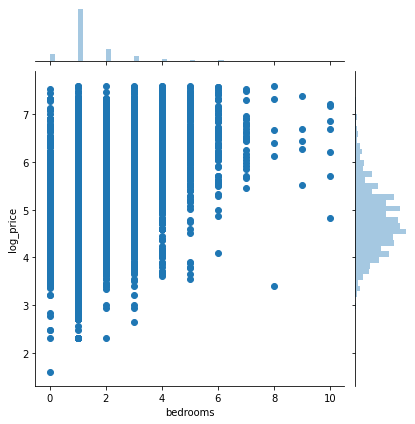

In [27]:
sns.jointplot(x = "bedrooms", y = "log_price", data = data_train)

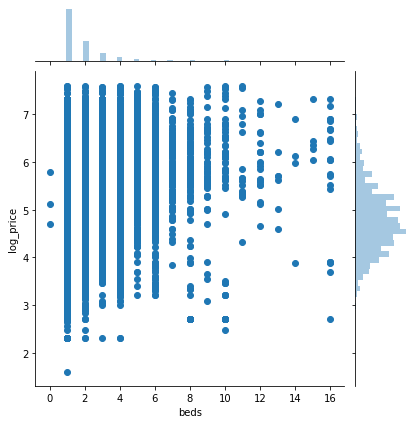

In [28]:
sns.jointplot(x = "beds", y = "log_price", data = data_train)

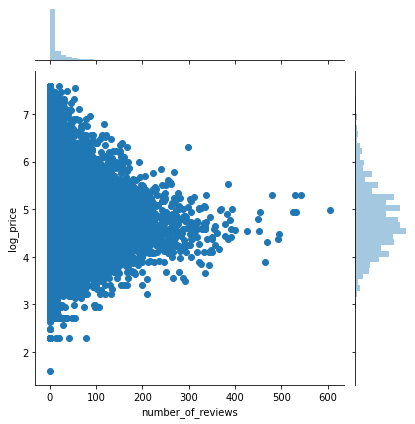

In [29]:
sns.jointplot(x = "number_of_reviews", y = "log_price", data = data_train)

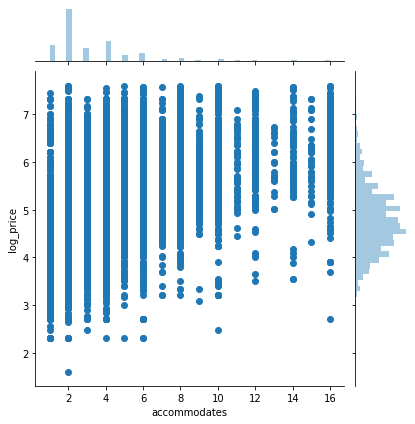

In [30]:
sns.jointplot(x = "accommodates", y = "log_price", data = data_train)

In [31]:
data_train.dtypes

id                          int64
property_type              object
room_type                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
host_has_profile_pic       object
host_identity_verified     object
host_since                 object
instant_bookable           object
neighbourhood              object
number_of_reviews           int64
bedrooms                  float64
beds                      float64
log_price                 float64
dtype: object

In [32]:
data_test.dtypes

id                                 int64
property_type                     object
room_type                         object
accommodates                       int64
bathrooms                        float64
bed_type                          object
cancellation_policy               object
cleaning_fee                        bool
city                              object
host_has_profile_pic              object
host_identity_verified            object
host_since                datetime64[ns]
instant_bookable                  object
neighbourhood                     object
number_of_reviews                  int64
bedrooms                         float64
beds                             float64
dtype: object

In [33]:
## Visualizing the property type
data_train["property_type"].value_counts()

Apartment             33113
House                 11138
Condominium            1759
Townhouse              1146
Loft                    834
Other                   392
Guesthouse              324
Bed & Breakfast         320
Bungalow                264
Villa                   120
Dorm                     99
Guest suite              83
Camper/RV                63
In-law                   49
Cabin                    49
Hostel                   48
Timeshare                46
Boutique hotel           44
Boat                     36
Serviced apartment       16
Tent                     12
Castle                    8
Vacation home             7
Yurt                      7
Treehouse                 6
Hut                       5
Chalet                    3
Earth House               2
Train                     1
Casa particular           1
Lighthouse                1
Parking Space             1
Cave                      1
Tipi                      1
Name: property_type, dtype: int64

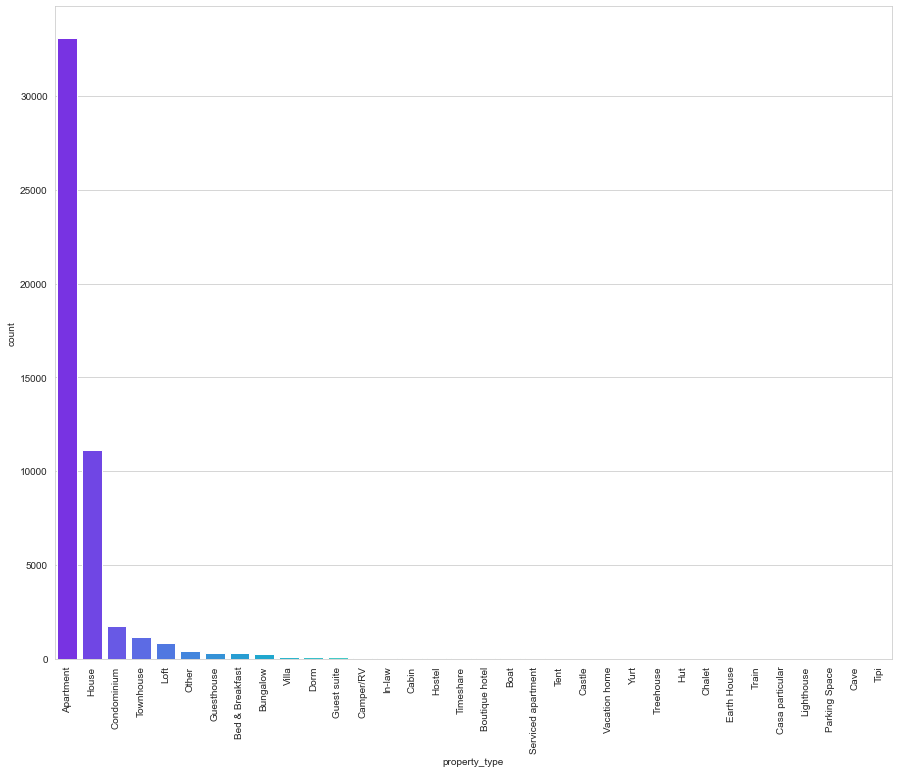

In [34]:
plt.figure(figsize=(15,12))
sns.set_style('whitegrid')
sns.countplot(x="property_type", data=data_train, palette='rainbow', order = data_train["property_type"].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

In [35]:
data_train['host_since'].value_counts()

3/30/2015     173
2/14/2014     114
5/18/2015      60
9/16/2016      58
11/11/2015     55
             ... 
10/7/2009       1
4/21/2008       1
9/6/2008        1
8/11/2010       1
7/23/2009       1
Name: host_since, Length: 3009, dtype: int64

In [36]:
data_train["host_since"]=pd.to_datetime(data_train["host_since"],infer_datetime_format=True)

In [37]:
data_train['host_since'].value_counts()

2015-03-30    173
2014-02-14    114
2015-05-18     60
2016-09-16     58
2015-11-11     55
             ... 
2017-10-03      1
2010-01-05      1
2009-11-12      1
2010-02-28      1
2010-03-02      1
Name: host_since, Length: 3009, dtype: int64

In [38]:
data_test["host_since"].value_counts()

2015-03-30    73
2014-02-14    59
2015-05-11    34
2014-09-02    34
2014-08-05    33
              ..
2011-03-24     1
2009-11-08     1
2009-08-03     1
2011-01-30     1
2010-01-28     1
Name: host_since, Length: 2866, dtype: int64

In [39]:
data_test["host_since"]=pd.to_datetime(data_test["host_since"],infer_datetime_format=True)

In [40]:
data_test["host_since"].value_counts()

2015-03-30    73
2014-02-14    59
2015-05-11    34
2014-09-02    34
2014-08-05    33
              ..
2011-03-24     1
2009-11-08     1
2009-08-03     1
2011-01-30     1
2010-01-28     1
Name: host_since, Length: 2866, dtype: int64

In [41]:
from datetime import date
data_train['Date'] = date.today().strftime('%Y-%m-%d')
data_test["Date"] = date.today().strftime('%Y-%m-%d')

In [42]:
data_train["Date"]=pd.to_datetime(data_train["Date"],infer_datetime_format=True)
data_test["Date"]=pd.to_datetime(data_test["Date"],infer_datetime_format=True)

In [43]:
data_train['day_diff']=(data_train['Date']-data_train['host_since']).dt.days
data_test['day_diff']=(data_test['Date']-data_test['host_since']).dt.days

In [44]:
for col in ['host_since','Date']:
    data_train.drop([col],1,inplace=True)
    data_test.drop([col],1,inplace=True)

In [45]:
data_train.dtypes

id                          int64
property_type              object
room_type                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
host_has_profile_pic       object
host_identity_verified     object
instant_bookable           object
neighbourhood              object
number_of_reviews           int64
bedrooms                  float64
beds                      float64
log_price                 float64
day_diff                  float64
dtype: object

In [46]:
data_train["room_type"].value_counts()

Entire home/apt    27905
Private room       20658
Shared room         1436
Name: room_type, dtype: int64

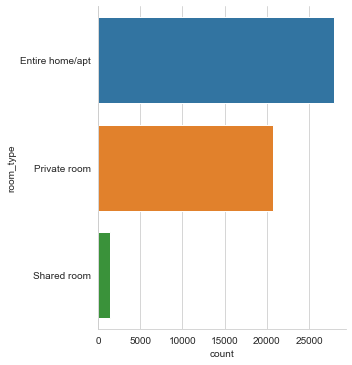

In [47]:
## Let's visualise the room type
sns.catplot(y="room_type", kind="count", data=data_train);

In [48]:
data_train["bed_type"].value_counts()

Real Bed         48575
Futon              518
Pull-out Sofa      403
Airbed             323
Couch              180
Name: bed_type, dtype: int64

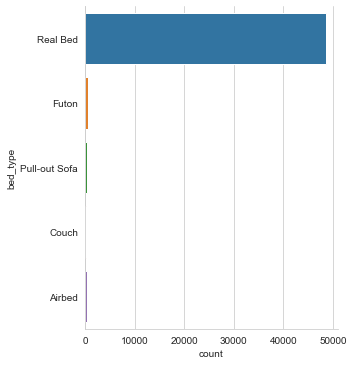

In [49]:
sns.catplot(y="bed_type", kind="count", data=data_train);

In [50]:
data_train['accommodates'].value_counts()

2     21529
4      8178
1      6360
3      5213
6      3331
5      2304
8      1199
7       640
10      472
16      210
12      190
9       183
14       77
11       51
15       38
13       24
Name: accommodates, dtype: int64

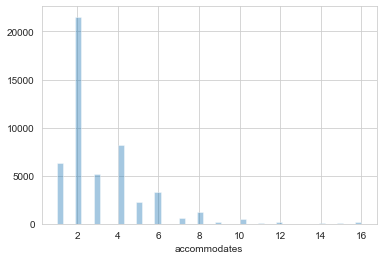

In [51]:
sns.distplot(data_train["accommodates"], bins=50, kde=False)

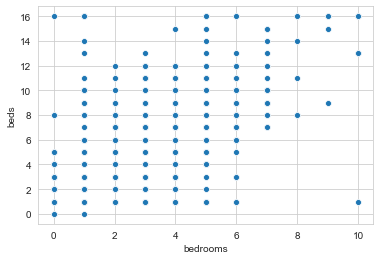

In [52]:
## Relationship between Bedroom and Beds
sns.scatterplot(data_train["bedrooms"], data_train["beds"])

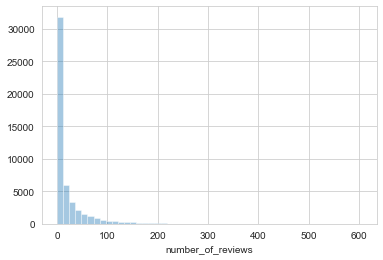

In [53]:
sns.distplot(data_train["number_of_reviews"], bins=50, kde=False)

# Plotting the Correlation Matrix

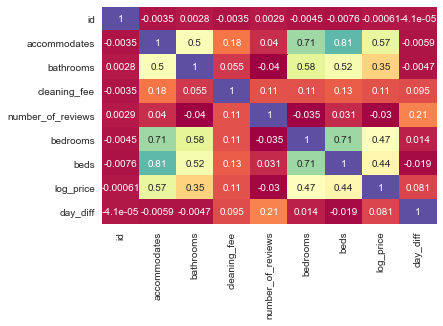

In [54]:
corr = data_train.corr()
sns.heatmap(corr, annot = True, cmap = "Spectral", cbar = False)

In [55]:
data_train["city"].value_counts()

NYC        21803
LA         15191
SF          4357
DC          3804
Chicago     2498
Boston      2346
Name: city, dtype: int64

In [56]:
data_train["cleaning_fee"].value_counts()

True     36627
False    13372
Name: cleaning_fee, dtype: int64

In [57]:
data_train["cleaning_fee"]=np.where(data_train["cleaning_fee"]==True,1,0)

In [58]:
data_train["cleaning_fee"].value_counts()

1    36627
0    13372
Name: cleaning_fee, dtype: int64

In [59]:
data_test["cleaning_fee"].value_counts()

True     17775
False     6336
Name: cleaning_fee, dtype: int64

In [60]:
data_test["cleaning_fee"]=np.where(data_test["cleaning_fee"]==True,1,0)

In [61]:
data_test["cleaning_fee"].value_counts()

1    17775
0     6336
Name: cleaning_fee, dtype: int64

In [62]:
data_train.dtypes

id                          int64
property_type              object
room_type                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                int32
city                       object
host_has_profile_pic       object
host_identity_verified     object
instant_bookable           object
neighbourhood              object
number_of_reviews           int64
bedrooms                  float64
beds                      float64
log_price                 float64
day_diff                  float64
dtype: object

In [63]:
data_test.dtypes

id                          int64
property_type              object
room_type                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                int32
city                       object
host_has_profile_pic       object
host_identity_verified     object
instant_bookable           object
neighbourhood              object
number_of_reviews           int64
bedrooms                  float64
beds                      float64
day_diff                  float64
dtype: object

In [64]:
data_train["host_has_profile_pic"].value_counts()

t    49722
f      150
Name: host_has_profile_pic, dtype: int64

In [65]:
data_train["cancellation_policy"].value_counts()

strict             21811
flexible           15237
moderate           12865
super_strict_30       75
super_strict_60       11
Name: cancellation_policy, dtype: int64

In [66]:
data_train["host_identity_verified"].value_counts()

t    33545
f    16327
Name: host_identity_verified, dtype: int64

In [67]:
data_train["instant_bookable"].value_counts()

f    36873
t    13126
Name: instant_bookable, dtype: int64

In [68]:
data_train["neighbourhood"].value_counts()

Williamsburg          1909
Bedford-Stuyvesant    1462
Bushwick              1081
Upper West Side        966
Mid-Wilshire           961
                      ... 
Clearing                 1
Observatory Circle       1
Oakwood                  1
Presidio                 1
O'Hare                   1
Name: neighbourhood, Length: 598, dtype: int64

# 3) TRAIN TEST SPLIT

In [69]:
x_train,x_test = train_test_split(data_train, test_size = 0.2, random_state = 1) ##Splitting Train Datasets

In [70]:
x_train1 = x_train.drop(["log_price","id"],1)
y_train1 = x_train["log_price"]

In [71]:
x_test1 = x_test.drop(["log_price",'id'],1)
y_test1 = x_test["log_price"]

In [72]:
x_train1.shape, y_train1.shape

((39999, 16), (39999,))

In [73]:
x_test1.shape, y_test1.shape

((10000, 16), (10000,))

# 4) CREATING MODEL TRANSFORMER AND PIPELINE

In [74]:
num_col = x_train1.select_dtypes(np.number).columns ##Generating Numeric col separately

In [75]:
char_col = x_train1.select_dtypes(object).columns ##Generating Character col separately

In [76]:
num_col, char_col

(Index(['accommodates', 'bathrooms', 'cleaning_fee', 'number_of_reviews',
        'bedrooms', 'beds', 'day_diff'],
       dtype='object'),
 Index(['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city',
        'host_has_profile_pic', 'host_identity_verified', 'instant_bookable',
        'neighbourhood'],
       dtype='object'))

In [77]:
pipe_num = make_pipeline(SimpleImputer(strategy = 'median'), StandardScaler()) ## Creating Pipeline
pipe_char = make_pipeline(SimpleImputer(strategy = "constant", fill_value= "Missing"),OneHotEncoder(handle_unknown = 'ignore'))

In [78]:
ctrans = make_column_transformer((pipe_num,num_col),(pipe_char,char_col)) ## ColumnTransformer

In [79]:
ctrans.fit_transform(x_train1)

<39999x652 sparse matrix of type '<class 'numpy.float64'>'
	with 639984 stored elements in Compressed Sparse Row format>

# 5) MACHINE LEARNING ALGORITHM - XGBOOST

In [80]:
strings="xgb__"
parameters={'n_estimators':[40,60,80,100],
            'max_depth':range(2,10,1),
            'learning_rate':[.1,.01,.05],
            'reg_lambda':[.1,.01,1,10],
            'reg_alpha':[.1,.01,1,10]}

In [81]:
parameters.items()

dict_items([('n_estimators', [40, 60, 80, 100]), ('max_depth', range(2, 10)), ('learning_rate', [0.1, 0.01, 0.05]), ('reg_lambda', [0.1, 0.01, 1, 10]), ('reg_alpha', [0.1, 0.01, 1, 10])])

In [82]:
strings = 'xgb__'

xgb_params = {}
for k, v in parameters.items():
    xgb_params[strings + k] = v

In [83]:
xgb_params

{'xgb__n_estimators': [40, 60, 80, 100],
 'xgb__max_depth': range(2, 10),
 'xgb__learning_rate': [0.1, 0.01, 0.05],
 'xgb__reg_lambda': [0.1, 0.01, 1, 10],
 'xgb__reg_alpha': [0.1, 0.01, 1, 10]}

In [84]:
xgb = xgbs.XGBRegressor()
pipe=Pipeline([('columntransfer',ctrans),('xgb',xgb)])

In [85]:
grid = RandomizedSearchCV(pipe,xgb_params,cv=5,scoring="neg_mean_absolute_error")

In [86]:
grid

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=[('columntransfer',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='drop',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('pipeline-1',
                                                                               Pipeline(memory=None,
                                                                                        steps=[('simpleimputer',
                                                                                                SimpleImputer(add_indicator=False,
                                                      

In [87]:
grid.fit(x_train1,y_train1);

[11:01:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:01:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:01:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:01:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:01:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:01:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:02:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:02:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:02:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [88]:
grid.predict(x_train1)

array([4.6467915, 4.341945 , 4.276498 , ..., 4.937532 , 4.099142 ,
       3.9697971], dtype=float32)

In [89]:
grid.predict(x_test1)

array([4.321413 , 4.472864 , 4.960134 , ..., 4.45023  , 3.1954067,
       4.213263 ], dtype=float32)

# PREDICTING MEAN SQUARED ERROR AND R2 

In [90]:
print("\nTraining MSE:", round(mean_squared_error(y_train1, grid.predict(x_train1)),4))
print("Validation MSE:", round(mean_squared_error(y_test1, grid.predict(x_test1)),4))
print("\nTraining r2:", round(r2_score(y_train1, grid.predict(x_train1)),4))
print("Validation r2:", round(r2_score(y_test1, grid.predict(x_test1)),4))


Training MSE: 0.1568
Validation MSE: 0.1755

Training r2: 0.6952
Validation r2: 0.6569


In [92]:
print("\nTraining MSE:", round(mean_squared_error(y_train1, grid.predict(x_train)),4))
print("Validation MSE:", round(mean_squared_error(y_test1, grid.predict(x_test)),4))
print("\nTraining r2:", round(r2_score(y_train1, grid.predict(x_train)),4))
print("Validation r2:", round(r2_score(y_test1, grid.predict(x_test)),4))


Training MSE: 0.1568
Validation MSE: 0.1755

Training r2: 0.6952
Validation r2: 0.6569


# FEATURE IMPORTANCE

In [100]:
onehotcols =  ctrans.named_transformers_['pipeline-2']['onehotencoder'].get_feature_names()

In [101]:
onehotcols

array(['x0_Apartment', 'x0_Bed & Breakfast', 'x0_Boat',
       'x0_Boutique hotel', 'x0_Bungalow', 'x0_Cabin', 'x0_Camper/RV',
       'x0_Castle', 'x0_Cave', 'x0_Chalet', 'x0_Condominium', 'x0_Dorm',
       'x0_Earth House', 'x0_Guest suite', 'x0_Guesthouse', 'x0_Hostel',
       'x0_House', 'x0_Hut', 'x0_In-law', 'x0_Lighthouse', 'x0_Loft',
       'x0_Other', 'x0_Parking Space', 'x0_Serviced apartment', 'x0_Tent',
       'x0_Timeshare', 'x0_Tipi', 'x0_Townhouse', 'x0_Train',
       'x0_Treehouse', 'x0_Vacation home', 'x0_Villa', 'x0_Yurt',
       'x1_Entire home/apt', 'x1_Private room', 'x1_Shared room',
       'x2_Airbed', 'x2_Couch', 'x2_Futon', 'x2_Pull-out Sofa',
       'x2_Real Bed', 'x3_flexible', 'x3_moderate', 'x3_strict',
       'x3_super_strict_30', 'x3_super_strict_60', 'x4_Boston',
       'x4_Chicago', 'x4_DC', 'x4_LA', 'x4_NYC', 'x4_SF', 'x5_Missing',
       'x5_f', 'x5_t', 'x6_Missing', 'x6_f', 'x6_t', 'x7_f', 'x7_t',
       'x8_16th Street Heights', 'x8_Adams Morgan', 'x

In [103]:
all_columns = list(num_col) + list(onehotcols)

In [104]:
all_columns

['accommodates',
 'bathrooms',
 'cleaning_fee',
 'number_of_reviews',
 'bedrooms',
 'beds',
 'day_diff',
 'x0_Apartment',
 'x0_Bed & Breakfast',
 'x0_Boat',
 'x0_Boutique hotel',
 'x0_Bungalow',
 'x0_Cabin',
 'x0_Camper/RV',
 'x0_Castle',
 'x0_Cave',
 'x0_Chalet',
 'x0_Condominium',
 'x0_Dorm',
 'x0_Earth House',
 'x0_Guest suite',
 'x0_Guesthouse',
 'x0_Hostel',
 'x0_House',
 'x0_Hut',
 'x0_In-law',
 'x0_Lighthouse',
 'x0_Loft',
 'x0_Other',
 'x0_Parking Space',
 'x0_Serviced apartment',
 'x0_Tent',
 'x0_Timeshare',
 'x0_Tipi',
 'x0_Townhouse',
 'x0_Train',
 'x0_Treehouse',
 'x0_Vacation home',
 'x0_Villa',
 'x0_Yurt',
 'x1_Entire home/apt',
 'x1_Private room',
 'x1_Shared room',
 'x2_Airbed',
 'x2_Couch',
 'x2_Futon',
 'x2_Pull-out Sofa',
 'x2_Real Bed',
 'x3_flexible',
 'x3_moderate',
 'x3_strict',
 'x3_super_strict_30',
 'x3_super_strict_60',
 'x4_Boston',
 'x4_Chicago',
 'x4_DC',
 'x4_LA',
 'x4_NYC',
 'x4_SF',
 'x5_Missing',
 'x5_f',
 'x5_t',
 'x6_Missing',
 'x6_f',
 'x6_t',
 'x7_

In [106]:
df = pd.DataFrame(grid.best_estimator_['xgb'].feature_importances_, index = all_columns).reset_index(drop=False)

In [107]:
df = df.rename({'index': 'variables', 0:'Importance'}, axis = 1)

In [108]:
df = df.sort_values(['Importance'], ascending=False)
df = df.set_index('variables')

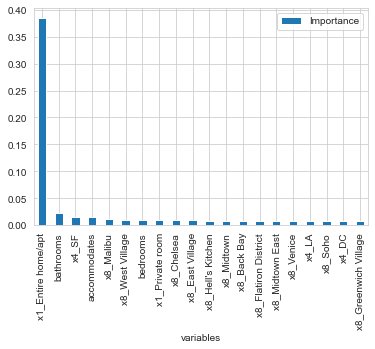

In [109]:
df.iloc[0:20,:].plot(kind='bar');

In [114]:
ft_weights_xgb_reg = pd.DataFrame(grid.best_estimator_['xgb'].feature_importances_, columns=['weight'], index=all_columns)
ft_weights_xgb_reg.sort_values('weight', ascending=False, inplace=True)
ft_weights_xgb_reg.head(10)

,weight
x1_Entire home/apt,0.384861
bathrooms,0.022565
x4_SF,0.014844
accommodates,0.014421
x8_Malibu,0.010807
x8_West Village,0.009246
bedrooms,0.009154
x1_Private room,0.009000
x8_Chelsea,0.008954
x8_East Village,0.008531


# SUBMISSION

In [116]:
pred_final = grid.predict(data_test)

In [117]:
pred_final=pd.DataFrame(pred_final)

In [118]:
pred_final.columns=["log_price"]

In [119]:
pred_final["id"]=data_test.id

In [120]:
pred_final=pred_final[["id","log_price"]]

In [121]:
pred_final.head()

,id,log_price
0,5979389,4.203019
1,13488121,4.810305
2,8121643,4.690732
3,16490010,4.328553
4,16274069,4.952802


In [122]:
data_test.shape,pred_final.shape

((24111, 17), (24111, 2))

In [123]:
pred_final=pred_final.to_csv("Abdeali_Case_Study.csv",index=False)

In [124]:
grid.best_params_

{'xgb__reg_lambda': 10,
 'xgb__reg_alpha': 1,
 'xgb__n_estimators': 100,
 'xgb__max_depth': 8,
 'xgb__learning_rate': 0.1}

# THANK YOU !!!